# Comparing Lazy Portfolios

This Quantopian Research based notebook compares SPY to the following portfolios:
1. SPY 100%
2. VTI/AGG 50/50 (stocks and bonds 50% / 50%)
3. VTI/AGG 60/40
4. VTI/AGG 70/30
5. The Swensen Portfolio: TIP 15%, TLT 15%, VNQ 15%, EEM 10%, EFA 15%, VTI 30%
6. My variation (POP): EDV 30%,VNQ 15%,VWO','EFA','VBR','MDY','RSP')
    context.pcts =        [ 0.30, 0.15, 0.1, 0.15, 0.10,  0.0,  0.2]  

In [1]:
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns

In [8]:
def stats(backtest):
    return backtest.risk.tail(1)

In [6]:
swensen = get_backtest('54fa0196e9787f0f115152aa')
pop = get_backtest('54fa094ca1094d0f12b31520')
spy = get_backtest('54fa0435f3bb8b0f0e66bb4f')

100% Time: 0:00:08|###########################################################|
100% Time: 0:00:08|###########################################################|
100% Time: 0:00:05|###########################################################|


In [10]:
pop = get_backtest('54fa094ca1094d0f12b31520')

100% Time: 0:00:08|###########################################################|


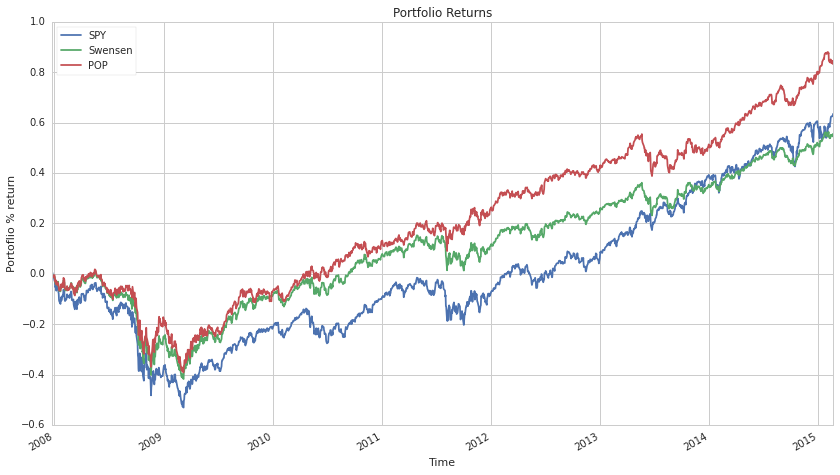

In [11]:
#swensen.risk.treasury_period_return.plot(label="Tresuries")
swensen.risk.benchmark_period_return.plot(label='SPY')
swensen.risk.period_return.plot(label="Swensen")
pop.risk.period_return.plot(label="POP")
pyplot.title("Portfolio Returns")
pyplot.legend(loc='best')
pyplot.ylabel("Portoflio % return")
pyplot.xlabel("Time")

In [12]:
df_stats = stats(spy)
df_stats['Portfolio'] = 'SPY'
sw_stats = stats(swensen)
sw_stats['Portfolio'] = 'Swensen'
df_stats = df_stats.append(sw_stats)
pop_stats = stats(pop)
pop_stats['Portfolio'] = 'POP'
df_stats = df_stats.append(pop_stats)
df_stats = df_stats.set_index('Portfolio')
df_stats.transpose()

Portfolio,SPY,Swensen,POP
alpha,-0.00418823,0.00554064,0.04966755
benchmark_period_return,0.6348488,0.6348488,0.6348488
benchmark_volatility,0.2238107,0.2238107,0.2238107
beta,0.9778877,0.7508968,0.6977093
excess_return,0.5729296,0.5329673,0.8228448
information,-0.02595153,-0.06333204,0.1599096
max_drawdown,0.5264934,0.4221693,0.4020085
period_label,2015-02,2015-02,2015-02
period_return,0.5942296,0.5542673,0.8441448
sharpe,0.2823406,0.3159118,0.5285849


In [11]:
# this no longer works: swensen.benchmark_security.symbol

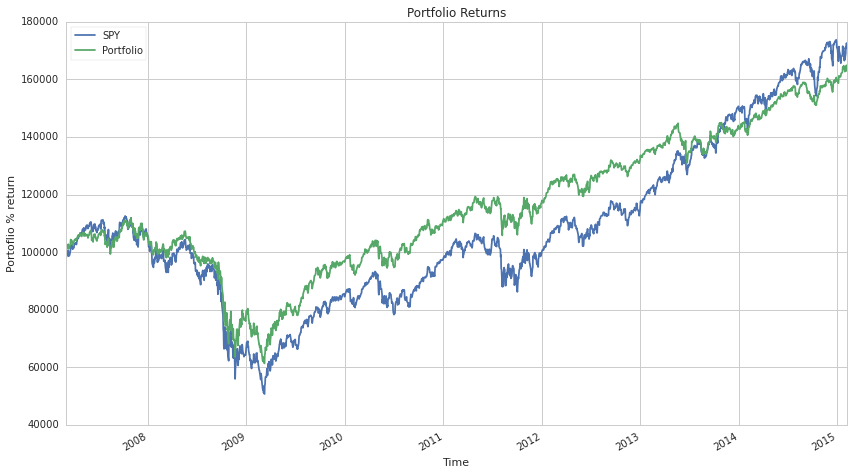

In [350]:
((result.risk.benchmark_period_return + 1) * result.capital_base).plot(label=result.benchmark_security.symbol)
((result.risk.period_return + 1) * result.capital_base).plot(label="Portfolio")
pyplot.title("Portfolio Returns")
pyplot.legend(loc='best')
pyplot.ylabel("Portoflio % return")
pyplot.xlabel("Time")

In [328]:
benchmark_daily_close = get_pricing(swensen.benchmark_security.symbol, fields='close_price', 
                                    start_date= swensen.start_date,
                                    end_date = swensen.end_date,
                                    frequency='daily')

base_mult = swensen.capital_base / benchmark_daily_close[0]
benchmark_ending_portfolio_value = benchmark_daily_close * base_mult
benchmark_ending_portfolio_value[:5]

2007-03-02 00:00:00+00:00    100000.000000
2007-03-05 00:00:00+00:00     99071.808893
2007-03-06 00:00:00+00:00    100590.012952
2007-03-07 00:00:00+00:00    100345.373435
2007-03-08 00:00:00+00:00    101122.463664
Freq: C, Name: Security(8554 [SPY]), dtype: float64

In [329]:
base_mult * 138

99294.862570153986

In [330]:
benchmark_daily_close[:5]

2007-03-02 00:00:00+00:00    138.98
2007-03-05 00:00:00+00:00    137.69
2007-03-06 00:00:00+00:00    139.80
2007-03-07 00:00:00+00:00    139.46
2007-03-08 00:00:00+00:00    140.54
Freq: C, Name: Security(8554 [SPY]), dtype: float64

In [ ]:
100

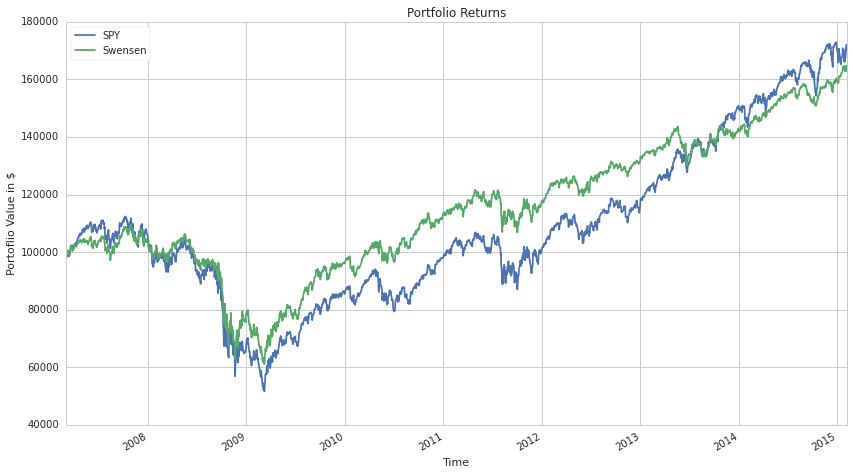

In [37]:
spy.cumulative_performance.ending_portfolio_value.plot(label="SPY",colormap=None)
swensen.cumulative_performance.ending_portfolio_value.plot(label="Swensen")
#benchmark_ending_portfolio_value.plot(label=swensen.benchmark_security.symbol)
pyplot.title("Portfolio Returns")
pyplot.legend(loc='best')
pyplot.ylabel("Portoflio Value in $")
pyplot.xlabel("Time")

In [175]:
swensen.cumulative_performance.ending_portfolio_value[:5]

2007-03-02 00:00:00+00:00     99216.726551
2007-03-05 00:00:00+00:00     97801.685739
2007-03-06 00:00:00+00:00     99567.124901
2007-03-07 00:00:00+00:00     99273.012439
2007-03-08 00:00:00+00:00    100110.389799
Name: ending_portfolio_value, dtype: float64

In [176]:
spy.cumulative_performance.ending_portfolio_value[:5]

2007-03-02 00:00:00+00:00     99164.60486
2007-03-05 00:00:00+00:00     98243.54486
2007-03-06 00:00:00+00:00     99750.08486
2007-03-07 00:00:00+00:00     99507.32486
2007-03-08 00:00:00+00:00    100278.44486
Name: ending_portfolio_value, dtype: float64

In [197]:
# days with rebalancing transactions
transactions = [str(t.date()) for t in list(swensen.transactions.index.unique())]
transactions

['2007-03-02',
 '2008-01-09',
 '2008-10-09',
 '2008-11-21',
 '2009-07-27',
 '2010-05-06',
 '2010-05-26',
 '2012-05-08',
 '2013-11-13']

In [178]:
# how many transactions ?
len(transactions)

9

In [ ]:
stats(spy)

In [297]:
#csv_VTHRX = fetch_url('http://ichart.yahoo.com/table.csv?s=VTHRX&a=0&b=0&c=2007&d=1&e=6&f=2015&g=d&ignore=.csv')
df_VTHRX = local_csv('VTHRX.csv')
df_VTHRX[:3]

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-02-06,29.30,29.30,29.30,29.30,0,29.30
1,2015-02-05,29.47,29.47,29.47,29.47,0,29.47
2,2015-02-04,29.24,29.24,29.24,29.24,0,29.24


In [298]:
df_VTHRX.set_index('Date',inplace=True)
df_VTHRX.index = pd.to_datetime(df_VTHRX.index) # pd.DatetimeIndex(df_VTHRX.Date) # df_VTHRX.set_index('Date')
df_VTHRX.sort(inplace=True)
df_VTHRX = df_VTHRX[pd.datetime(2007, 3, 2):]
VTHRX_base_mult = swensen.capital_base / df_VTHRX['Adj Close'][0]
df_VTHRX['ending_portfolio_value'] = df_VTHRX['Adj Close'] * VTHRX_base_mult
df_VTHRX[:5]

,Open,High,Low,Close,Volume,Adj Close,ending_portfolio_value
2007-03-02,22.34,22.34,22.34,22.34,0,18.88,100000.000000
2007-03-05,22.09,22.09,22.09,22.09,0,18.67,98887.711864
2007-03-06,22.44,22.44,22.44,22.44,0,18.97,100476.694915
2007-03-07,22.41,22.41,22.41,22.41,0,18.94,100317.796610
2007-03-08,22.58,22.58,22.58,22.58,0,19.09,101112.288136


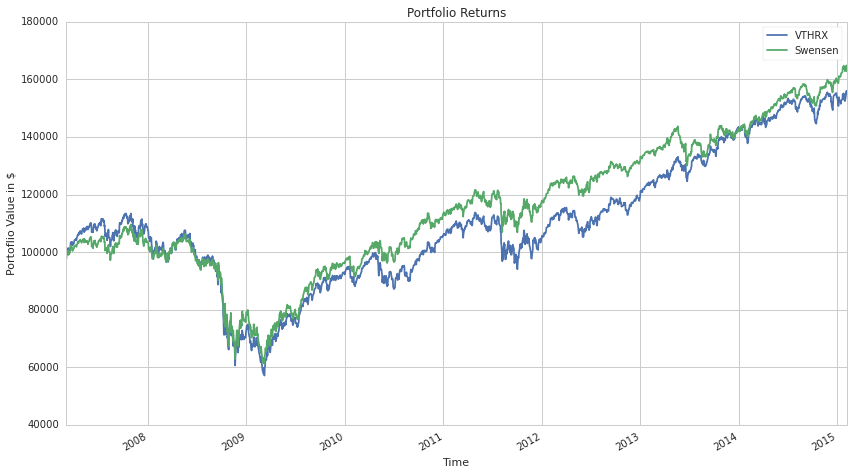

In [306]:
df_VTHRX.ending_portfolio_value.plot(label="VTHRX")
swensen.cumulative_performance.ending_portfolio_value.plot(label="Swensen")
#spy.cumulative_performance.ending_portfolio_value.plot(label="SPY", style=[':'])
pyplot.title("Portfolio Returns")
pyplot.legend(loc='best')
pyplot.ylabel("Portoflio Value in $")
pyplot.xlabel("Time")

In [72]:
M5050 = get_backtest('54ea9bd57c6f390f1639a55f')
M6040 = get_backtest('54ea9beba77a8b0f24e91f8c')
M7030 = get_backtest('54ea9bff52d9f50f07c03985')

100% Time: 0:00:07|###########################################################|
100% Time: 0:00:06|###########################################################|
100% Time: 0:00:07|###########################################################|


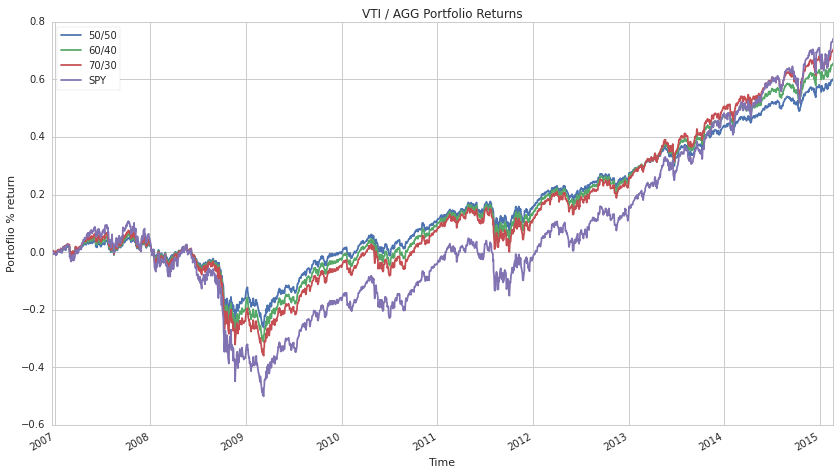

In [48]:
M5050.risk.period_return.plot(label="50/50")
M6040.risk.period_return.plot(label="60/40")
M7030.risk.period_return.plot(label="70/30")
M5050.risk.benchmark_period_return.plot(label='SPY')
pyplot.title("VTI / AGG Portfolio Returns")
pyplot.legend(loc='best')
pyplot.ylabel("Portoflio % return")
pyplot.xlabel("Time")

In [74]:
df_stats = stats(spy)
df_stats['Portfolio'] = 'SPY'
M5050_stats = stats(M5050)
M5050_stats['Portfolio'] = '50/50'
df_stats = df_stats.append(M5050_stats)
M6040_stats = stats(M6040)
M6040_stats['Portfolio'] = '60/40'
df_stats = df_stats.append(M6040_stats)
M7030_stats = stats(M7030)
M7030_stats['Portfolio'] = '70/30'
df_stats = df_stats.append(M7030_stats)
df_stats = df_stats.set_index('Portfolio')
df_stats.transpose()

Portfolio,SPY,50/50,60/40,70/30
alpha,0.001307798,0.02107049,0.02066013,0.01940546
benchmark_period_return,0.7411849,0.7411849,0.7411849,0.7411849
benchmark_volatility,0.2168138,0.2168138,0.2168138,0.2168138
beta,0.9827479,0.4520165,0.5532459,0.656437
excess_return,0.7207527,0.5806055,0.6347158,0.6830577
information,0.0004995468,-0.1654271,-0.08460003,-0.0311927
max_drawdown,0.541778,0.2972374,0.3520304,0.4043448
period_label,2015-02,2015-02,2015-02,2015-02
period_return,0.7420527,0.6019055,0.6560158,0.7043577
sharpe,0.3272416,0.5086997,0.4791808,0.449542
